In [1]:
# Libraries
import math
import pandas as pd
import sympy as smp
import numpy as np
from sympy import *
from math import *

# Scipy stats
from scipy.stats import rv_discrete
from scipy.stats import binom
from scipy.stats import expon
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import uniform

# Scipy operations
from scipy.integrate import quad
from scipy.misc import derivative
import scipy.integrate as integrate
import scipy.special as special

# Miscellaneous
import matplotlib.pyplot as plt
# from fractions import Fraction
from sympy import Rational as R
from sympy import nsimplify
from IPython.display import display, Math, Latex
%matplotlib inline
from IPython.display import Image, HTML

In [2]:
#exercise 1 
#a. Find the marginal PMFs of X and Y

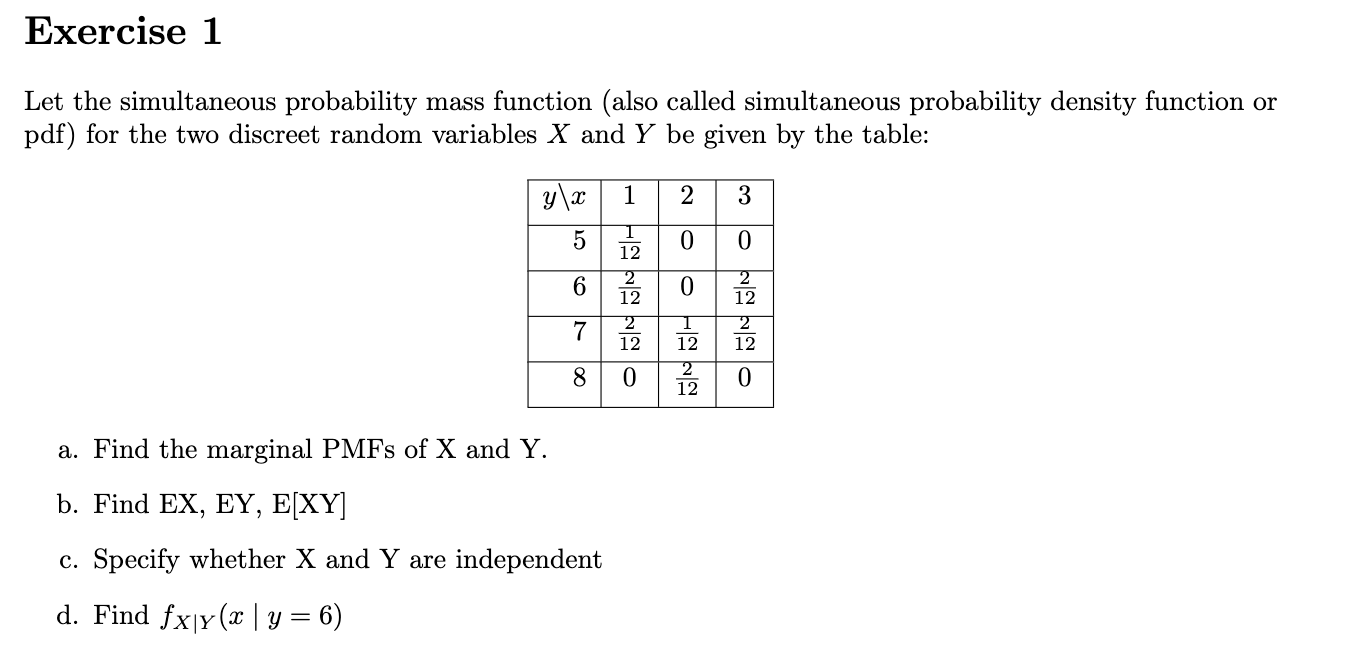

In [3]:
Image('https://cdn.mathpix.com/snip/images/FRpvSLdzpDswHqd-gaJMKS69V6G9ZHQJBjp-ZL-HRjc.original.fullsize.png', width=500)

In [4]:
index = [5, 6, 7, 8]
columns = {
    1: [R(1,12), R(2,12), R(2,12), 0], 
    2: [0, 0, R(1,12), R(2,12)], 
    3: [0, R(2,12), R(2,12), 0]
}

df = pd.DataFrame(data = columns, index = index)

In [5]:
#a) Find the marginal PMFs of X and Y

marginal_pmf_x = df.sum(axis=0)
print(marginal_pmf_x)

1    5/12
2     1/4
3     1/3
dtype: object


In [6]:
#the marginal PMFs of Y
marginal_pmf_y = df.apply(sum, axis=1)
print(marginal_pmf_y)

5    1/12
6     1/3
7    5/12
8     1/6
dtype: object


In [7]:
#b) Find EX and EY and EXY
EX = np.array(df.columns).dot(marginal_pmf_x)
print("E[X]: {} , {}".format(EX, round(float(EX), 2)))
EY = np.array(df.index).dot(marginal_pmf_y)
print("E[Y]: {} , {}".format(EY, round(float(EY), 2)))
EXY = np.array(df.index).dot(np.array(df)).dot(np.array(df.columns))
print("E[XY]: {} , {}".format(EXY, round(float(EXY), 2)))

E[X]: 23/12 , 1.92
E[Y]: 20/3 , 6.67
E[XY]: 155/12 , 12.92


In [8]:
#c)
# convert the DataFrame values to floating-point numbers
joint_pmf_float = df.astype(float)

#Calculate the marginal prob. of X and Y
marginal_pmf_x = joint_pmf_float.sum(axis=0)
marginal_pmf_y = joint_pmf_float.sum(axis=1)

#Check if X and Y are independent
is_independent = np.isclose(joint_pmf_float.values, marginal_pmf_y[:, np.newaxis] * marginal_pmf_x.values).all()

if is_independent:
    print("X and Y are independent")
else:
    print("X and Y are not independent")

X and Y are not independent


/var/folders/0d/xh0t2jcs0471b2ljhkld6w800000gn/T/ipykernel_7774/3340763093.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  is_independent = np.isclose(joint_pmf_float.values, marginal_pmf_y[:, np.newaxis] * marginal_pmf_x.values).all()


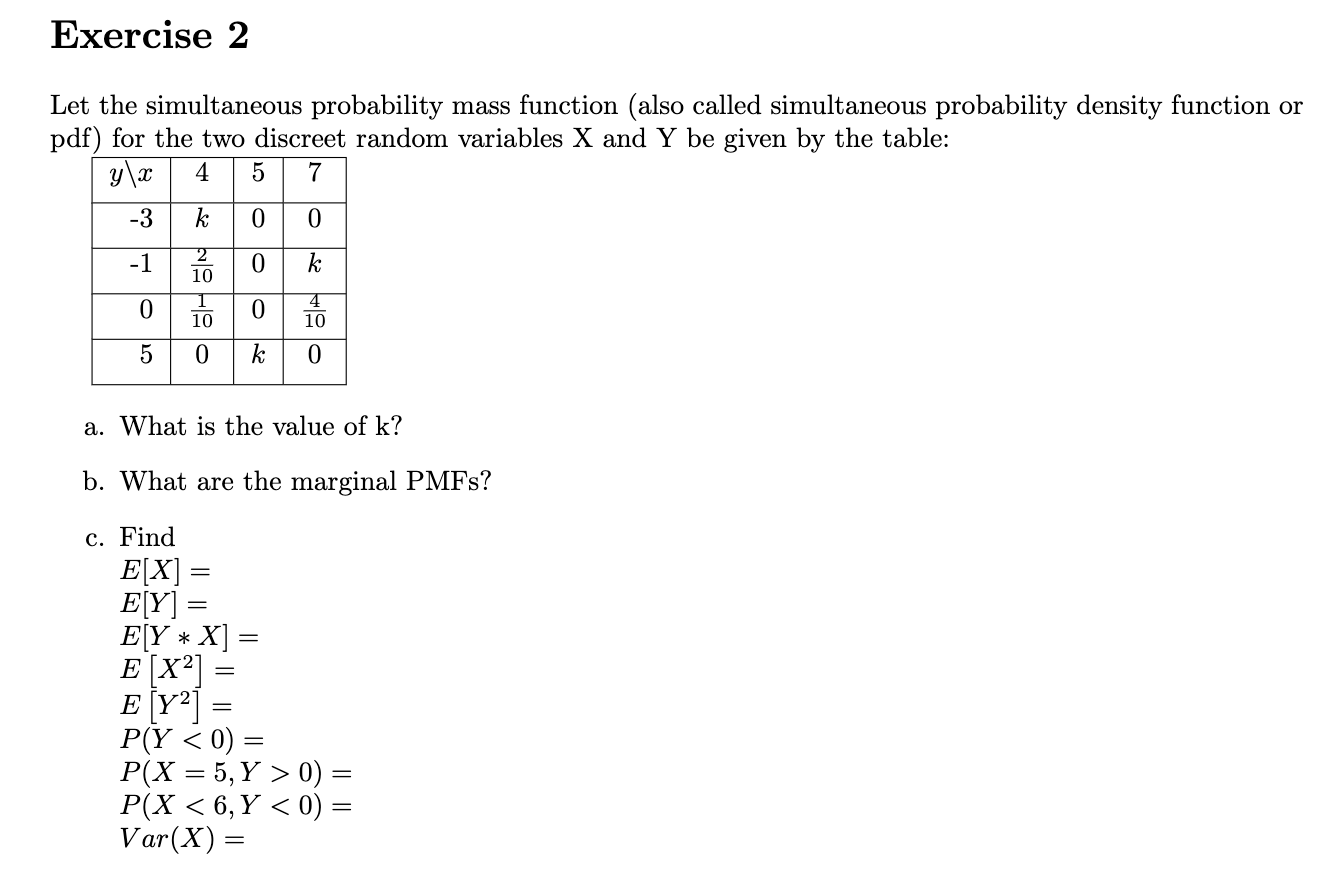

In [9]:
#Exercise 2
Image('https://cdn.mathpix.com/snip/images/cCCFMnys97WcJkIvV0EkSn2SaMJGQxC03OU-bSjSL1c.original.fullsize.png', width=500)

In [10]:
#a) Find the value for K
# we know that the sum og prob = 1, so we can find K
k = symbols('k')

# Define the equation 
eq = Eq(3*k + 7/10, 1)

# Solve the equation
k = solve(eq, k)
k = nsimplify(k[0], tolerance=1e-10)
print("K: {}, {}".format(k, float(k)))

K: 1/10, 0.1


In [11]:
#b)
index = [-3, -1, 0, 5]
columns = {
    4: [R(1,10), R(2,10), R(1,10), 0], 
    5: [0, 0, 0, R(1,10)], 
    7: [0, R(1,10), R(4,10), 0]
}

df = pd.DataFrame(data = columns, index = index)

#marginal PMFs of X and Y
marginal_pmf_x = df.sum(axis=0)
print(marginal_pmf_x)
marginal_pmf_y = df.apply(sum, axis=1)
print(marginal_pmf_y)

4     2/5
5    1/10
7     1/2
dtype: object
-3    1/10
-1    3/10
 0     1/2
 5    1/10
dtype: object


In [12]:
#c) Find EX and EY and EXY and E[X^2] and E[Y^2] and P(Y<0) and P(X=5, Y > 0) and P(X<6, Y < 0) and Var(X)
marginal_pmf_x_values = marginal_pmf_x.values
marginal_pmf_y_values = marginal_pmf_y.values

EX = np.array(df.columns).dot(marginal_pmf_x_values)
print("E[X]: {} , {}".format(EX, round(float(EX), 2)))

EY = np.array(df.index).dot(marginal_pmf_y_values)
print("E[Y]: {} , {}".format(EY, round(float(EY), 2)))

EXY = np.array(df.index).dot(np.array(df)).dot(np.array(df.columns))
print("E[XY]: {} , {}".format(EXY, round(float(EXY), 2)))

EX2 = (np.array(df.columns)**2).dot(marginal_pmf_x_values)
print("E[X^2]: {} , {}".format(EX2, round(float(EX2), 2)))

EY2 = (np.array(df.index)**2).dot(marginal_pmf_y_values)
print("E[Y^2]: {} , {}".format(EY2, round(float(EY2), 2)))

#P(Y<0) = 2/5 - From table

#P(X=5, Y > 0) = 1/10 - from table

# P_X_equals_5_Y_greater_than_0 = df.loc[5, :].sum()
# print("P(X=5, Y > 0): {} , {}".format(P_X_equals_5_Y_greater_than_0, round(float(P_X_equals_5_Y_greater_than_0), 2)))

#P(X<6, Y < 0) = 3/10 - from table
# P_X_less_than_6_Y_less_than_0 = df.loc[:5, :].sum().sum()
# print("P(X<6, Y < 0): {} , {}".format(P_X_less_than_6_Y_less_than_0, round(float(P_X_less_than_6_Y_less_than_0), 2)))

#Var(X)
var_x = EX2 - EX**2
print("Var(X): {} , {}".format(var_x, round(float(var_x), 2)))

E[X]: 28/5 , 5.6
E[Y]: -1/10 , -0.1
E[XY]: -1/5 , -0.2
E[X^2]: 167/5 , 33.4
E[Y^2]: 37/10 , 3.7
Var(X): 51/25 , 2.04


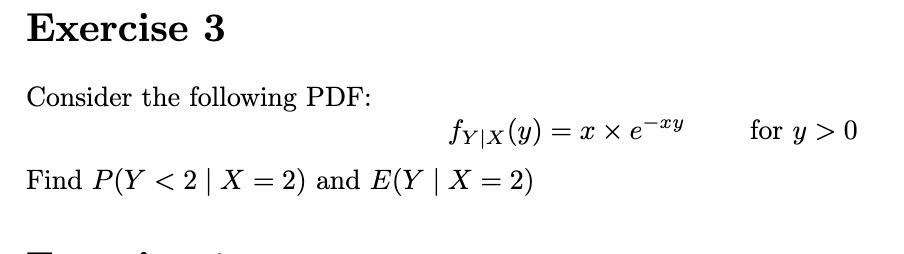

In [13]:
# Exercise 3

Image('https://cdn.mathpix.com/snip/images/SQ21-E5saLf3VN-4c58LpWHqNQwYe9qeZxJQCy8rEGE.original.fullsize.png', width=500)

In [14]:
# find P(Y<2∣X=2) and E(Y∣X=2)
x, y = symbols('x y')
result1 = smp.integrate(2*E**(-2*y), (y, 0, 2))
print(result1)
        
result2 = smp.integrate(y*2*E**(-2*y), (y, 0, oo))
print(result2)



1 - exp(-4)
1/2


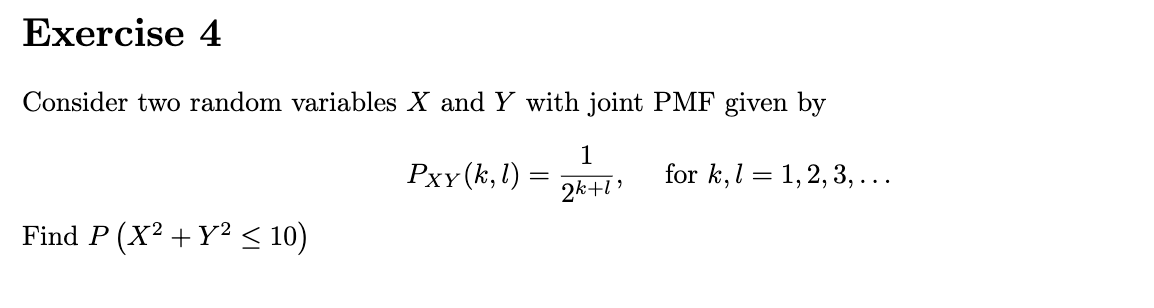

In [15]:
# Exercise 4

Image('https://cdn.mathpix.com/snip/images/vKZ0u544hLI3Toq8rxdmhE8LPERip93DKHtqUFXz_F4.original.fullsize.png', width=500)

In [16]:
#Not practical in python

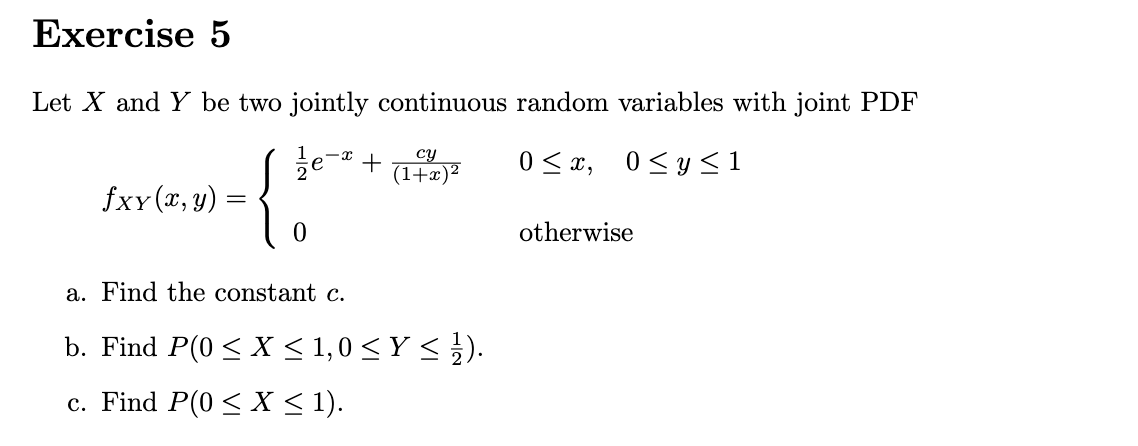

In [17]:
# Exercise 5

Image('https://cdn.mathpix.com/snip/images/nVXXrkhD9CgqlHlezYNDhvdVHiKPdyBYMi-QyANUf_I.original.fullsize.png', width=500)

In [18]:
#a) find the constant c 
x, y, c = symbols('x y c')

result = solve(smp.integrate(R(1/2)*E**(-x)+(c*y)/((1+x)**2), (x,0,oo), (y,0,1)) -1 ,c)

print("c: ", result)

c:  [1]


In [19]:
#b) Find P(0≤1, 0≤y≤1/2)
smp.integrate((R(1/2)*E**(-x))+(y/(1+x)**2), (x,0,1), (y,0,R(1/2)))


1/16 + (-1 + E)*exp(-1)/4

In [20]:
#c Find P(0≤X≤1)
x, y = symbols('x y')
display(smp.integrate((R(1/2)*E**(-x)) + (y/(1+x)**2), (x,0,1), (y,0,1)))
display(smp.integrate((R(1/2)*E**(-x)) + (y/(1+x)**2), (y,0,1), (x,0,1)))

1/4 + (-1 + E)*exp(-1)/2

3/4 - exp(-1)/2

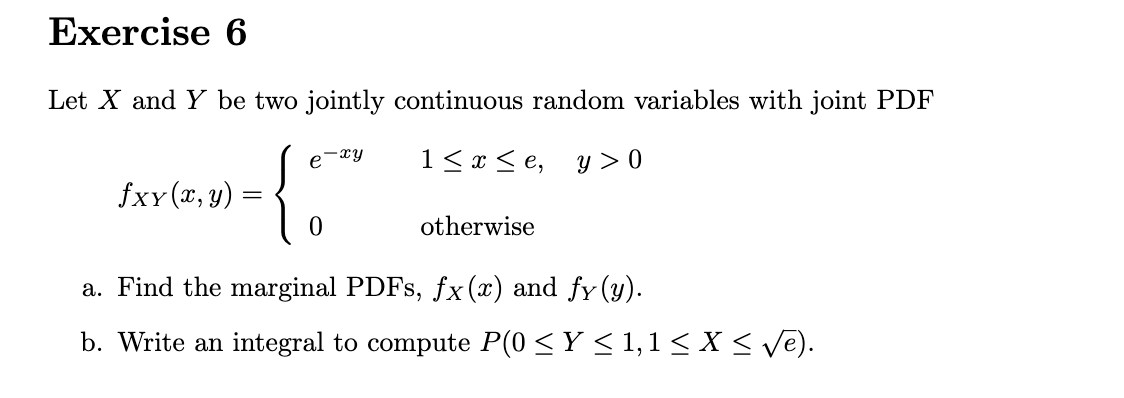

In [21]:
# Exercise 6
Image('https://cdn.mathpix.com/snip/images/UhKl6S7xn3a_VMDhQ1bZV2a7DIs4OW0ubvC1ZuSvH0c.original.fullsize.png', width=500)

In [22]:
#a) Find marginal PMFs of X and Y
fx = smp.integrate(E**(-x*y), (x,1,E), conds='none')
fy = smp.integrate(E**(-x*y), (y,0,oo), conds='none')
display(fx, fy)

-exp(-E*y)/y + exp(-y)/y

1/x

In [23]:
#b) 
smp.integrate(E**(-x*y), (x,1,math.sqrt(E)), (y,0,1))

log(-164872127070013*exp_polar(I*pi)/100000000000000) - 1.0*Ei(1.64872127070013*exp_polar(I*pi)) + Ei(exp_polar(I*pi))

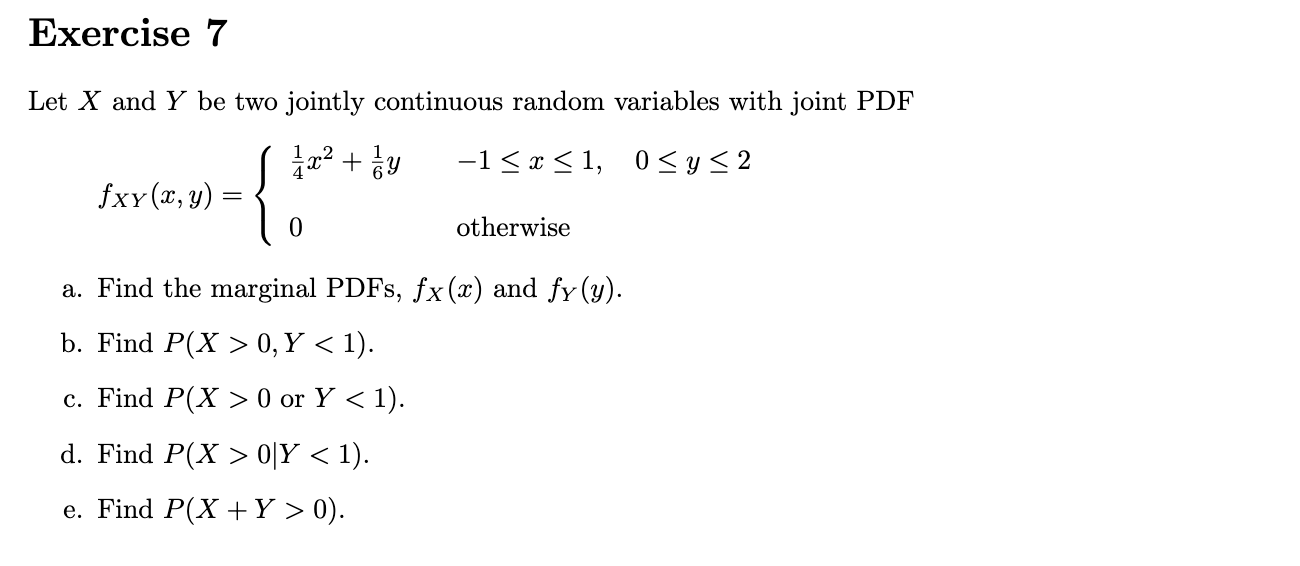

In [24]:
# Exercise 7
Image('https://cdn.mathpix.com/snip/images/u5NUGXQLAbWtlwMmzQfE42vnocoC2ns-F6ZBYTB3BPI.original.fullsize.png', width=500)

In [25]:
#a) Find marginal PMFs of X and Y
fxy = R(1,4)*x**2 + R(1,6)*y
fx = smp.integrate(fxy, (y,0,2))
fy = smp.integrate(fxy, (x,-1,1))
display(fx, fy)

x**2/2 + 1/3

y/3 + 1/6

In [26]:
#b) Find P(X>0, Y < 1)
smp.integrate(fxy, (x,0,1), (y,0,1))

1/6

In [27]:
#c) Find P(X>0 or Y < 1)
1 - smp.integrate(fxy, (x,-1,0), (y,1,2))

2/3

In [28]:
#d) Find P(x>0 | y<1)
smp.integrate(fxy/fy, (x,0,1), (y,0,1))

1/2

In [29]:
#e) find p(x + y > 0)
1 - smp.integrate(fxy, (y, 0, -x), (x,-1,0))

131/144